# T-cell population

$$\frac{dN(t)}{dt} = \text{rate of thymic export} - \text{rate of cell death} + \text{rate of cell division}$$

$$\frac{dN(t)}{dt} = \theta -\mu N(t) + \lambda N(t)=\theta - \beta N(t)$$

## Numerical Solution

(0.0, 104.9749999899308)

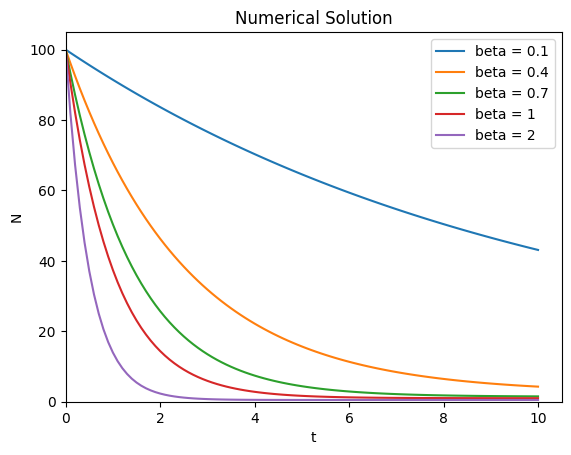

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dN_dt(y,t,theta,beta):
    return theta - beta*y


theta = 1


N0 = 100
t = np.linspace(0,10,101)

for beta in [0.1,0.4,0.7,1,2]:
    sol = odeint(dN_dt,N0,t,args = (theta,beta))

    plt.plot(t,sol,label = f"beta = {beta}")

plt.legend()
plt.title("Numerical Solution N = 100")
plt.xlabel("t")
plt.ylabel("N")
plt.xlim(0,)
plt.ylim(0,)

(0.0, 6.637265922395568)

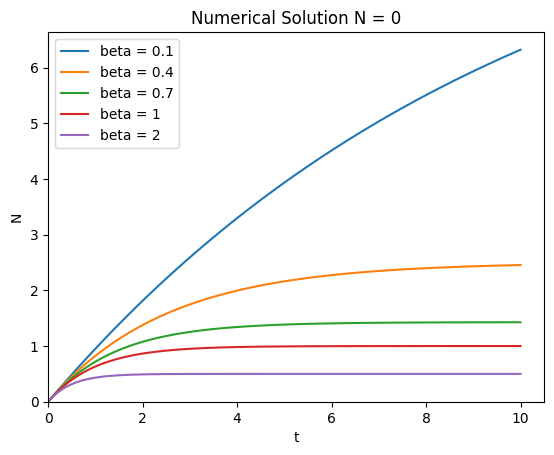

In [21]:
for beta in [0.1,0.4,0.7,1,2]:
    sol = odeint(dN_dt,0,t,args = (theta,beta))

    plt.plot(t,sol,label = f"beta = {beta}")

plt.legend()
plt.title("Numerical Solution N = 0")
plt.xlabel("t")
plt.ylabel("N")
plt.xlim(0,)
plt.ylim(0,)

# Mathematical Solution

We can rewrite the equation as $$\frac{dN}{dt} + \beta N(t) = \theta$$ which is a linear ODE of the form $$y'+a(x)y=b(x)$$ which is very easy to solve (already did that in chapter 1) and so

$\mu(x) = \exp (\int \beta dt) = e^{\beta t}$ giving

$$N(t) = e^{-\beta t}\left( \int \theta e ^{\beta t} dt + C \right) = e^{-\beta t} \left( \frac{\theta e^{\beta t}}{\beta} + C\right)$$

for t = 0

$$N(0) = \frac{\theta}{\beta} + C \text{ so } C = N(0) - \frac{\theta}{\beta}$$

so 

$$N(t)= \frac{\theta}{\beta} + \frac{N(0)}{e^{\beta t}} - \frac{\theta }{\beta e^{\beta t}}

(0.0, 104.97499998974575)

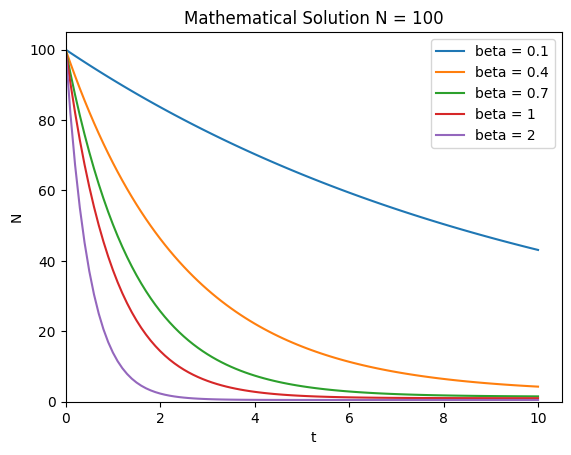

In [23]:
def math_sol(N0,t,beta,theta):
    return theta/beta + N0/np.exp(beta*t) -theta/(beta * np.exp(beta*t))


for beta in [0.1,0.4,0.7,1,2]:
    sol = math_sol(100,t,beta,theta)

    plt.plot(t,sol,label = f"beta = {beta}")

plt.legend()
plt.title("Mathematical Solution N = 100")
plt.xlabel("t")
plt.ylabel("N")
plt.xlim(0,)
plt.ylim(0,)